### MSDS 422 Assignment 1 - Exploring and Visualizing Data
#### James Maxwell - Jan 11th, 2020
##### Analyze MSPA Software Survey data from 2016 and draw insights from it

#### Notebook is divided up into 3 sections:
##### 1. Data preparation and exploration
##### 2. Data visualization and data scaling and comparisons
##### 3. Results and recommendations


### 1. Data preparation and exploration

In [1]:
# External libraries for visualizations and data manipulation
import pandas as pd              # data frame operations  
import numpy as np               # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import pandas_profiling
import seaborn as sns            # pretty plotting, including heat map
import warnings
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler    # facilitate data transformations
from sklearn.preprocessing import MinMaxScaler      # facilitate data transformations

#options
sns.set(color_codes = True)
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read in survey data csv file creating a pandas DataFrame object valid_survey_input
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

In [3]:
# DataFrame size
print(f'Dataset: Number of rows/respondents is {valid_survey_input.shape[0]} and number of attributes/columns is {valid_survey_input.shape[1]}')

Dataset: Number of rows/respondents is 207 and number of attributes/columns is 41


In [4]:
# Explore contents of valid_survey_input, there is a mix of numerical and categorical data
print('Structure and Contents of survey data DataFrame:\n')
valid_survey_input.info()

Structure and Contents of survey data DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
RespondentID                        207 non-null int64
Personal_JavaScalaSpark             207 non-null int64
Personal_JavaScriptHTMLCSS          207 non-null int64
Personal_Python                     207 non-null int64
Personal_R                          207 non-null int64
Personal_SAS                        207 non-null int64
Professional_JavaScalaSpark         207 non-null int64
Professional_JavaScriptHTMLCSS      207 non-null int64
Professional_Python                 207 non-null int64
Professional_R                      207 non-null int64
Professional_SAS                    207 non-null int64
Industry_JavaScalaSpark             207 non-null int64
Industry_JavaScriptHTMLCSS          207 non-null int64
Industry_Python                     207 non-null int64
Industry_R                          207 non-null int64
Industry_SAS        

In [5]:
# Inspect first 10 rows of valid_survey_input
valid_survey_input.head(10)

,RespondentID,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
0,5135740122,0,0,0,50,50,0,0,0,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5133300037,10,10,50,30,0,25,25,30,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
2,5132253300,20,0,40,40,0,0,0,40,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
3,5132096630,10,10,25,35,20,10,10,25,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
4,5131990362,20,0,0,70,10,20,0,0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018
5,5131860849,25,15,30,30,0,10,30,30,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
6,5131698528,20,0,40,30,10,70,0,25,5,...,NaN,NaN,PREDICT 455 Data Visualization (R),NaN,NaN,NaN,NaN,NaN,NaN,Summer 2019
7,5130809490,0,0,40,40,20,20,20,40,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer 2018
8,5130188921,30,15,20,20,15,30,20,30,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
9,5129721525,0,0,50,50,0,0,0,50,50,...,NaN,NaN,NaN,NaN,NaN,NaN,Other Course with R as the Primary Language,NaN,NaN,Winter 2019


In [6]:
# using profiling to review the dataset
pandas_profiling.ProfileReport(valid_survey_input)

Number of variables,41
Number of observations,207
Total Missing (%),35.5%
Total size in memory,66.4 KiB
Average record size in memory,328.4 B
Numeric,21
Categorical,20
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [7]:
# Use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

In [8]:
# Gather basic statistics on the numerical data
valid_survey_input.describe()

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,Industry_JavaScalaSpark,Industry_JavaScriptHTMLCSS,Industry_Python,Industry_R,Industry_SAS,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,206.000000,200.000000,203.000000,200.000000,187.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058,73.529126,58.045000,55.201970,53.630000,6.342246
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623,29.835429,32.588079,34.147954,33.539493,3.170849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000,53.000000,29.500000,25.000000,21.500000,4.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000,82.500000,60.000000,60.000000,51.500000,6.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000,100.000000,89.250000,85.000000,80.250000,9.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000,100.000000,100.000000,100.000000,100.000000,12.000000


##### Based on inspection of the valid_survey_input DataFrame I choose to look at 4 subgroupings of data which require their own wrangling and create associated DataFrames to be used in section 2.
1. software preferences - from 15 columns of personal, professional and industry software preference data  
2. future course interest - from 4 columns of interest data   
3. courses completed - from 20 columns of course completed data
4. graduation date - from a single column of graduation data   

1. software preferences - from 15 columns of personal, professional and industry software preference data

In [9]:
# create a new df software_pref_df which contains only 15 cols of interest
software_pref_df = valid_survey_input.loc[:,'Personal_JavaScalaSpark':'Industry_SAS']

In [10]:
# confirm only 15 cols exist in software_pref_df
software_pref_df.shape

(207, 15)

In [11]:
# shorten the variable/column names for software preference variables
software_pref_df = software_pref_df.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

In [12]:
# inspect first 5 rows of software_pref_df.shape
software_pref_df.head()

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
RespondentID,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,0,0,0,50,50
5133300037,10,10,50,30,0,25,25,30,20,0,20,25,40,15,0
5132253300,20,0,40,40,0,0,0,40,40,20,30,0,30,40,0
5132096630,10,10,25,35,20,10,10,25,35,20,10,10,25,35,20
5131990362,20,0,0,70,10,20,0,0,80,0,40,0,0,60,0


In [13]:
# melt converts wide form to long form
software_pref_df_melt=pd.melt(software_pref_df)
#software_pref_df_melt.head()

2. future course interest - from 4 columns of interest data 

In [14]:
# define DataFrame interest_new_df for analysis of new course interest 
interest_new_df = valid_survey_input.loc[:, 'Python_Course_Interest':'Systems_Analysis_Course_Interest']

In [15]:
# inspect first 5 rows of interest_new_df
interest_new_df.head()

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
RespondentID,,,,
5135740122,50.0,90.0,51.0,50.0
5133300037,20.0,50.0,90.0,50.0
5132253300,100.0,70.0,100.0,60.0
5132096630,85.0,60.0,90.0,82.0
5131990362,60.0,10.0,40.0,80.0


In [16]:
# melt converts wide form to long form
interest_new_df_melt=pd.melt(interest_new_df)
#interest_new_df_melt.head()

3. courses completed - from 20 columns of course completed data

In [17]:
#create a new df courses_completed_df which contains only 15 cols of interest
courses_completed_df = valid_survey_input.loc[:,'Courses_Completed':'Other']

In [18]:
# verify DataFrame shape
courses_completed_df.shape

(207, 20)

In [19]:
# inspect first 5 rows
courses_completed_df.head()

,Courses_Completed,PREDICT400,PREDICT401,PREDICT410,PREDICT411,PREDICT413,PREDICT420,PREDICT422,PREDICT450,PREDICT451,PREDICT452,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other
RespondentID,,,,,,,,,,,,,,,,,,,,
5135740122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5133300037,6.0,PREDICT 400 Math for Modelers (Python),PREDICT 401 Introduction to Statistical Analys...,PREDICT 410 Regression and Multivariate Analys...,PREDICT 411 Generalized Linear Models (SAS),NaN,PREDICT 420 Database Systems and Data Preparat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5132253300,4.0,PREDICT 400 Math for Modelers (Python),PREDICT 401 Introduction to Statistical Analys...,NaN,NaN,NaN,PREDICT 420 Database Systems and Data Preparat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5132096630,7.0,PREDICT 400 Math for Modelers (Python),PREDICT 401 Introduction to Statistical Analys...,PREDICT 410 Regression and Multivariate Analys...,PREDICT 411 Generalized Linear Models (SAS),NaN,PREDICT 420 Database Systems and Data Preparat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5131990362,7.0,NaN,PREDICT 401 Introduction to Statistical Analys...,PREDICT 410 Regression and Multivariate Analys...,PREDICT 411 Generalized Linear Models (SAS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka


In [20]:
'''
There are 20 missing values in the Courses_Completed column - should be able to fill missing values in, based on 
calculating cumulative counts across the cols for each row for the other course data

Courses_Completed                   187 non-null float64
PREDICT400                          163 non-null object
PREDICT401                          171 non-null object
PREDICT410                          145 non-null object
PREDICT411                          113 non-null object
PREDICT413                          59 non-null object
PREDICT420                          127 non-null object
PREDICT422                          48 non-null object
PREDICT450                          17 non-null object
PREDICT451                          7 non-null object
PREDICT452                          13 non-null object
PREDICT453                          11 non-null object
PREDICT454                          5 non-null object
PREDICT455                          30 non-null object
PREDICT456                          6 non-null object
PREDICT457                          4 non-null object
OtherPython                         5 non-null object
OtherR                              14 non-null object
OtherSAS                            2 non-null object
Other                               26 non-null object
'''

'\nThere are 20 missing values in the Courses_Completed column - should be able to fill missing values in, based on \ncalculating cumulative counts across the cols for each row for the other course data\n\nCourses_Completed                   187 non-null float64\nPREDICT400                          163 non-null object\nPREDICT401                          171 non-null object\nPREDICT410                          145 non-null object\nPREDICT411                          113 non-null object\nPREDICT413                          59 non-null object\nPREDICT420                          127 non-null object\nPREDICT422                          48 non-null object\nPREDICT450                          17 non-null object\nPREDICT451                          7 non-null object\nPREDICT452                          13 non-null object\nPREDICT453                          11 non-null object\nPREDICT454                          5 non-null object\nPREDICT455                          30 non-null object\nPREDI

In [21]:
# show the 20 rows where courses complete is 0
# I can fill these missing entires with the actual number by calculating it from the other columns
# courses_completed_df[courses_completed_df['Courses_Completed'].isnull()]

In [22]:
# get a list of the columns
courses_complete_cols = [ col for col in list(courses_completed_df) if col.startswith('PREDICT') or col.startswith('Other')]

In [23]:
# expect to see 19 column names
len(courses_complete_cols)

19

In [24]:
# replace the NaN with 0's
courses_completed_df[courses_complete_cols] = courses_completed_df[courses_complete_cols].fillna(0)

In [25]:
# inspect first 5 rows
courses_completed_df.head()

,Courses_Completed,PREDICT400,PREDICT401,PREDICT410,PREDICT411,PREDICT413,PREDICT420,PREDICT422,PREDICT450,PREDICT451,PREDICT452,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other
RespondentID,,,,,,,,,,,,,,,,,,,,
5135740122,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5133300037,6.0,PREDICT 400 Math for Modelers (Python),PREDICT 401 Introduction to Statistical Analys...,PREDICT 410 Regression and Multivariate Analys...,PREDICT 411 Generalized Linear Models (SAS),0,PREDICT 420 Database Systems and Data Preparat...,0,0,0,0,0,0,0,0,0,0,0,0,0
5132253300,4.0,PREDICT 400 Math for Modelers (Python),PREDICT 401 Introduction to Statistical Analys...,0,0,0,PREDICT 420 Database Systems and Data Preparat...,0,0,0,0,0,0,0,0,0,0,0,0,0
5132096630,7.0,PREDICT 400 Math for Modelers (Python),PREDICT 401 Introduction to Statistical Analys...,PREDICT 410 Regression and Multivariate Analys...,PREDICT 411 Generalized Linear Models (SAS),0,PREDICT 420 Database Systems and Data Preparat...,0,0,0,0,0,0,0,0,0,0,0,0,0
5131990362,7.0,0,PREDICT 401 Introduction to Statistical Analys...,PREDICT 410 Regression and Multivariate Analys...,PREDICT 411 Generalized Linear Models (SAS),0,0,0,0,0,0,0,0,0,0,0,0,0,0,CS-435 with Weka


In [26]:
# convert anything in the slect columns to 1 that is not already 0
courses_completed_df[courses_complete_cols]= courses_completed_df[courses_complete_cols].astype(bool).astype(int)

In [27]:
# inspect first 5 rows
#courses_completed_df.head()

In [28]:
# add up the course columns across the dataframe
courses_completed_df['total_courses_calculated'] = courses_completed_df[courses_complete_cols].sum(axis=1)

In [29]:
courses_completed_df.head()

,Courses_Completed,PREDICT400,PREDICT401,PREDICT410,PREDICT411,PREDICT413,PREDICT420,PREDICT422,PREDICT450,PREDICT451,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,total_courses_calculated
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5133300037,6.0,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
5132253300,4.0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5132096630,7.0,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
5131990362,7.0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4


In [30]:
# substitute the value in total_courses_calculated in Courses_Completed where there is a NaN
courses_completed_df['Courses_Completed'] = courses_completed_df['Courses_Completed'].fillna(courses_completed_df['total_courses_calculated'])

In [31]:
# show rows where courses complete is 0 - there should be none now!!
courses_completed_df[courses_completed_df['Courses_Completed'].isnull()]

,Courses_Completed,PREDICT400,PREDICT401,PREDICT410,PREDICT411,PREDICT413,PREDICT420,PREDICT422,PREDICT450,PREDICT451,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,total_courses_calculated
RespondentID,,,,,,,,,,,,,,,,,,,,,


In [32]:
#courses_completed_df.head()

In [33]:
# create long from of the data from plotting later on in section 2
courses_completed_melt_df = pd.melt(courses_completed_df.drop(['Courses_Completed','total_courses_calculated'], axis=1))

In [34]:
courses_completed_melt_df.shape

(3933, 2)

In [35]:
#courses_completed_melt_df.head()

4. graduation date - from a single column of graduation data 

In [36]:
# split of the Graduate Date into its own DataFrame
graduation = valid_survey_input[['Graduate_Date']]

In [37]:
# check info
# graduation.info()

In [38]:
# inspect first 5 rows
# graduation.head()

In [39]:
# list many unique values in Graduate Date
graduation['Graduate_Date'].nunique()

14

In [40]:
# show many unique values in Graduate Date
graduation['Graduate_Date'].value_counts()

Spring 2018      30
Winter 2018      25
Winter 2017      25
Fall 2018        20
Spring 2017      19
Fall 2017        14
Summer 2017      14
Fall 2016        13
Summer 2018      11
Winter 2019      11
Spring 2019       9
2020 or Later     5
Fall 2019         5
Summer 2019       3
Name: Graduate_Date, dtype: int64

In [41]:
# how many entries are NaN?
graduation[graduation.isnull().any(axis=1)]

,Graduate_Date
RespondentID,
5135740122,NaN
5123135355,NaN
5115183111,NaN


In [42]:
# drop the 3 NaN
graduation = graduation.dropna()

In [43]:
#graduation.ix[5133300037]

In [44]:
# Create the dictionary to map the entry to a year only
year_dictionary ={'Spring 2018'  : '2018', 
                   'Winter 2017'  : '2017', 
                   'Winter 2018'  : '2018',
                   'Fall 2018'    : '2018', 
                   'Spring 2017'  : '2017', 
                   'Fall 2017'    : '2017',
                   'Summer 2017'  : '2017', 
                   'Fall 2016'    : '2016',
                   'Summer 2018'  : '2018', 
                   'Winter 2019'  : '2019', 
                   'Spring 2019'  : '2019',
                   '2020 or Later': '2020+', 
                   'Fall 2019'    : '2019', 
                   'Summer 2019'  : '2019',
                  } 

In [45]:
# map new column
graduation['Graduation_Year'] = graduation['Graduate_Date'].map(year_dictionary) 

In [46]:
# show the student counts per graduation year
graduation.sort_values('Graduation_Year')
graduation['Graduation_Year'].value_counts()

2018     86
2017     72
2019     28
2016     13
2020+     5
Name: Graduation_Year, dtype: int64

In [47]:
# show the student counts per graduation term
graduation.groupby(['Graduate_Date']).count()

,Graduation_Year
Graduate_Date,
2020 or Later,5
Fall 2016,13
Fall 2017,14
Fall 2018,20
Fall 2019,5
Spring 2017,19
Spring 2018,30
Spring 2019,9
Summer 2017,14


In [48]:
# show the student counts per graduation year
graduation.groupby(['Graduation_Year']).count()

,Graduate_Date
Graduation_Year,
2016,13
2017,72
2018,86
2019,28
2020+,5


### 2. Data visualization and data scaling and comparisons

1. software preferences

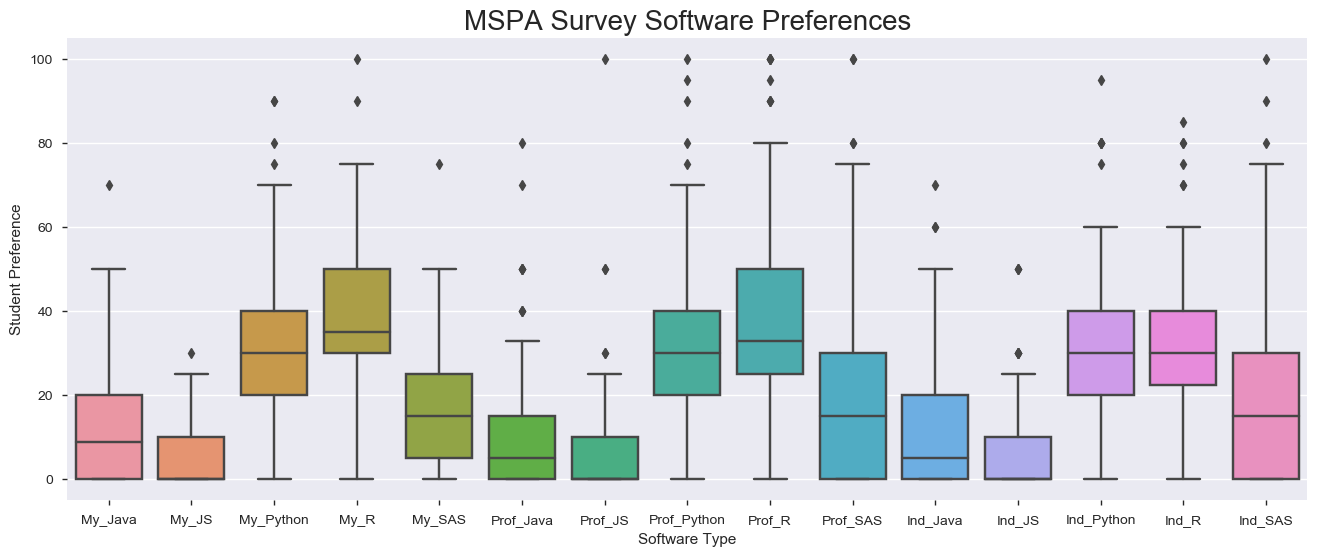

In [49]:
# plot a series of box plots for software preferences

plt.figure(figsize=(16, 6))

ax = sns.boxplot(x="variable", y="value", data=software_pref_df_melt)
ax.set_title('MSPA Survey Software Preferences',  fontsize=20)
ax.set_ylabel('Student Preference')
ax.set_xlabel('Software Type');

In [50]:
# drop the entries for JS and Java as these are less popular among students than Python, SAS and R
# data reduction by dropping 6 of 15 cols
software_pref_reduced_df = software_pref_df.drop(['My_Java','My_JS','Prof_Java','Prof_JS','Ind_Java','Ind_JS'],axis=1)

In [51]:
software_pref_reduced_df.shape

(207, 9)

In [52]:
#software_pref_reduced_df.info()

In [53]:
#software_pref_reduced_df = software_pref_reduced_df.apply(pd.to_numeric, errors='coerce', axis=1)
#software_pref_reduced_df = software_pref_reduced_df.astype(float)

In [54]:
#software_pref_reduced_df.info()

In [55]:
software_pref_reduced_df.shape

(207, 9)

In [56]:
# examine the covariance of the parameters - measures how the variables vary together
software_pref_reduced_df.cov()

,My_Python,My_R,My_SAS,Prof_Python,Prof_R,Prof_SAS,Ind_Python,Ind_R,Ind_SAS
My_Python,242.455466,-85.033558,-104.195019,217.767835,-92.034825,-97.860279,218.025749,-63.254327,-121.585901
My_R,-85.033558,212.459875,-30.803785,-96.018221,231.991253,-41.859505,-68.898527,154.712115,11.932109
My_SAS,-104.195019,-30.803785,185.678767,-110.504010,-43.586605,187.964964,-112.208879,-21.904812,184.302448
Prof_Python,217.767835,-96.018221,-110.504010,366.523428,-144.546081,-169.630013,272.817293,-76.425285,-185.370409
Prof_R,-92.034825,231.991253,-43.586605,-144.546081,434.622672,-107.057690,-94.647929,218.313634,1.135782
Prof_SAS,-97.860279,-41.859505,187.964964,-169.630013,-107.057690,354.638244,-155.287393,-40.207472,269.845293
Ind_Python,218.025749,-68.898527,-112.208879,272.817293,-94.647929,-155.287393,322.554993,-58.473618,-206.880822
Ind_R,-63.254327,154.712115,-21.904812,-76.425285,218.313634,-40.207472,-58.473618,253.198396,-28.750317
Ind_SAS,-121.585901,11.932109,184.302448,-185.370409,1.135782,269.845293,-206.880822,-28.750317,366.248628


In [57]:
#shape of the output datset from covariance
# software_pref_reduced_df.cov().shape

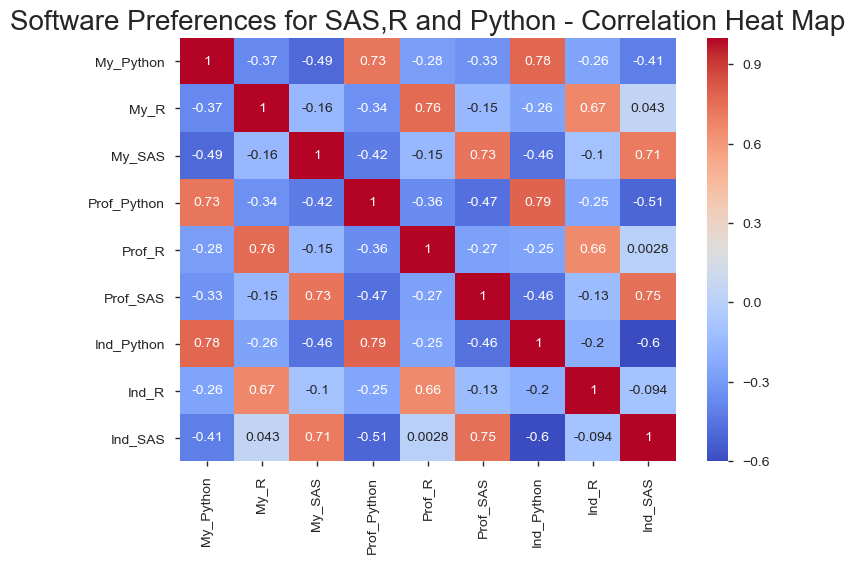

In [58]:
# plot a cxorrelation heat map for the software preferences for SAS,R and Python
myBasicCorr = software_pref_reduced_df.corr()

mask = np.zeros(myBasicCorr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

plt.title('Software Preferences for SAS,R and Python - Correlation Heat Map' , fontsize=20)

sns.heatmap(myBasicCorr, annot=True, cmap='coolwarm')

#need a work around to not cut half the top and bottom row off, this is related to matplotlib version
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

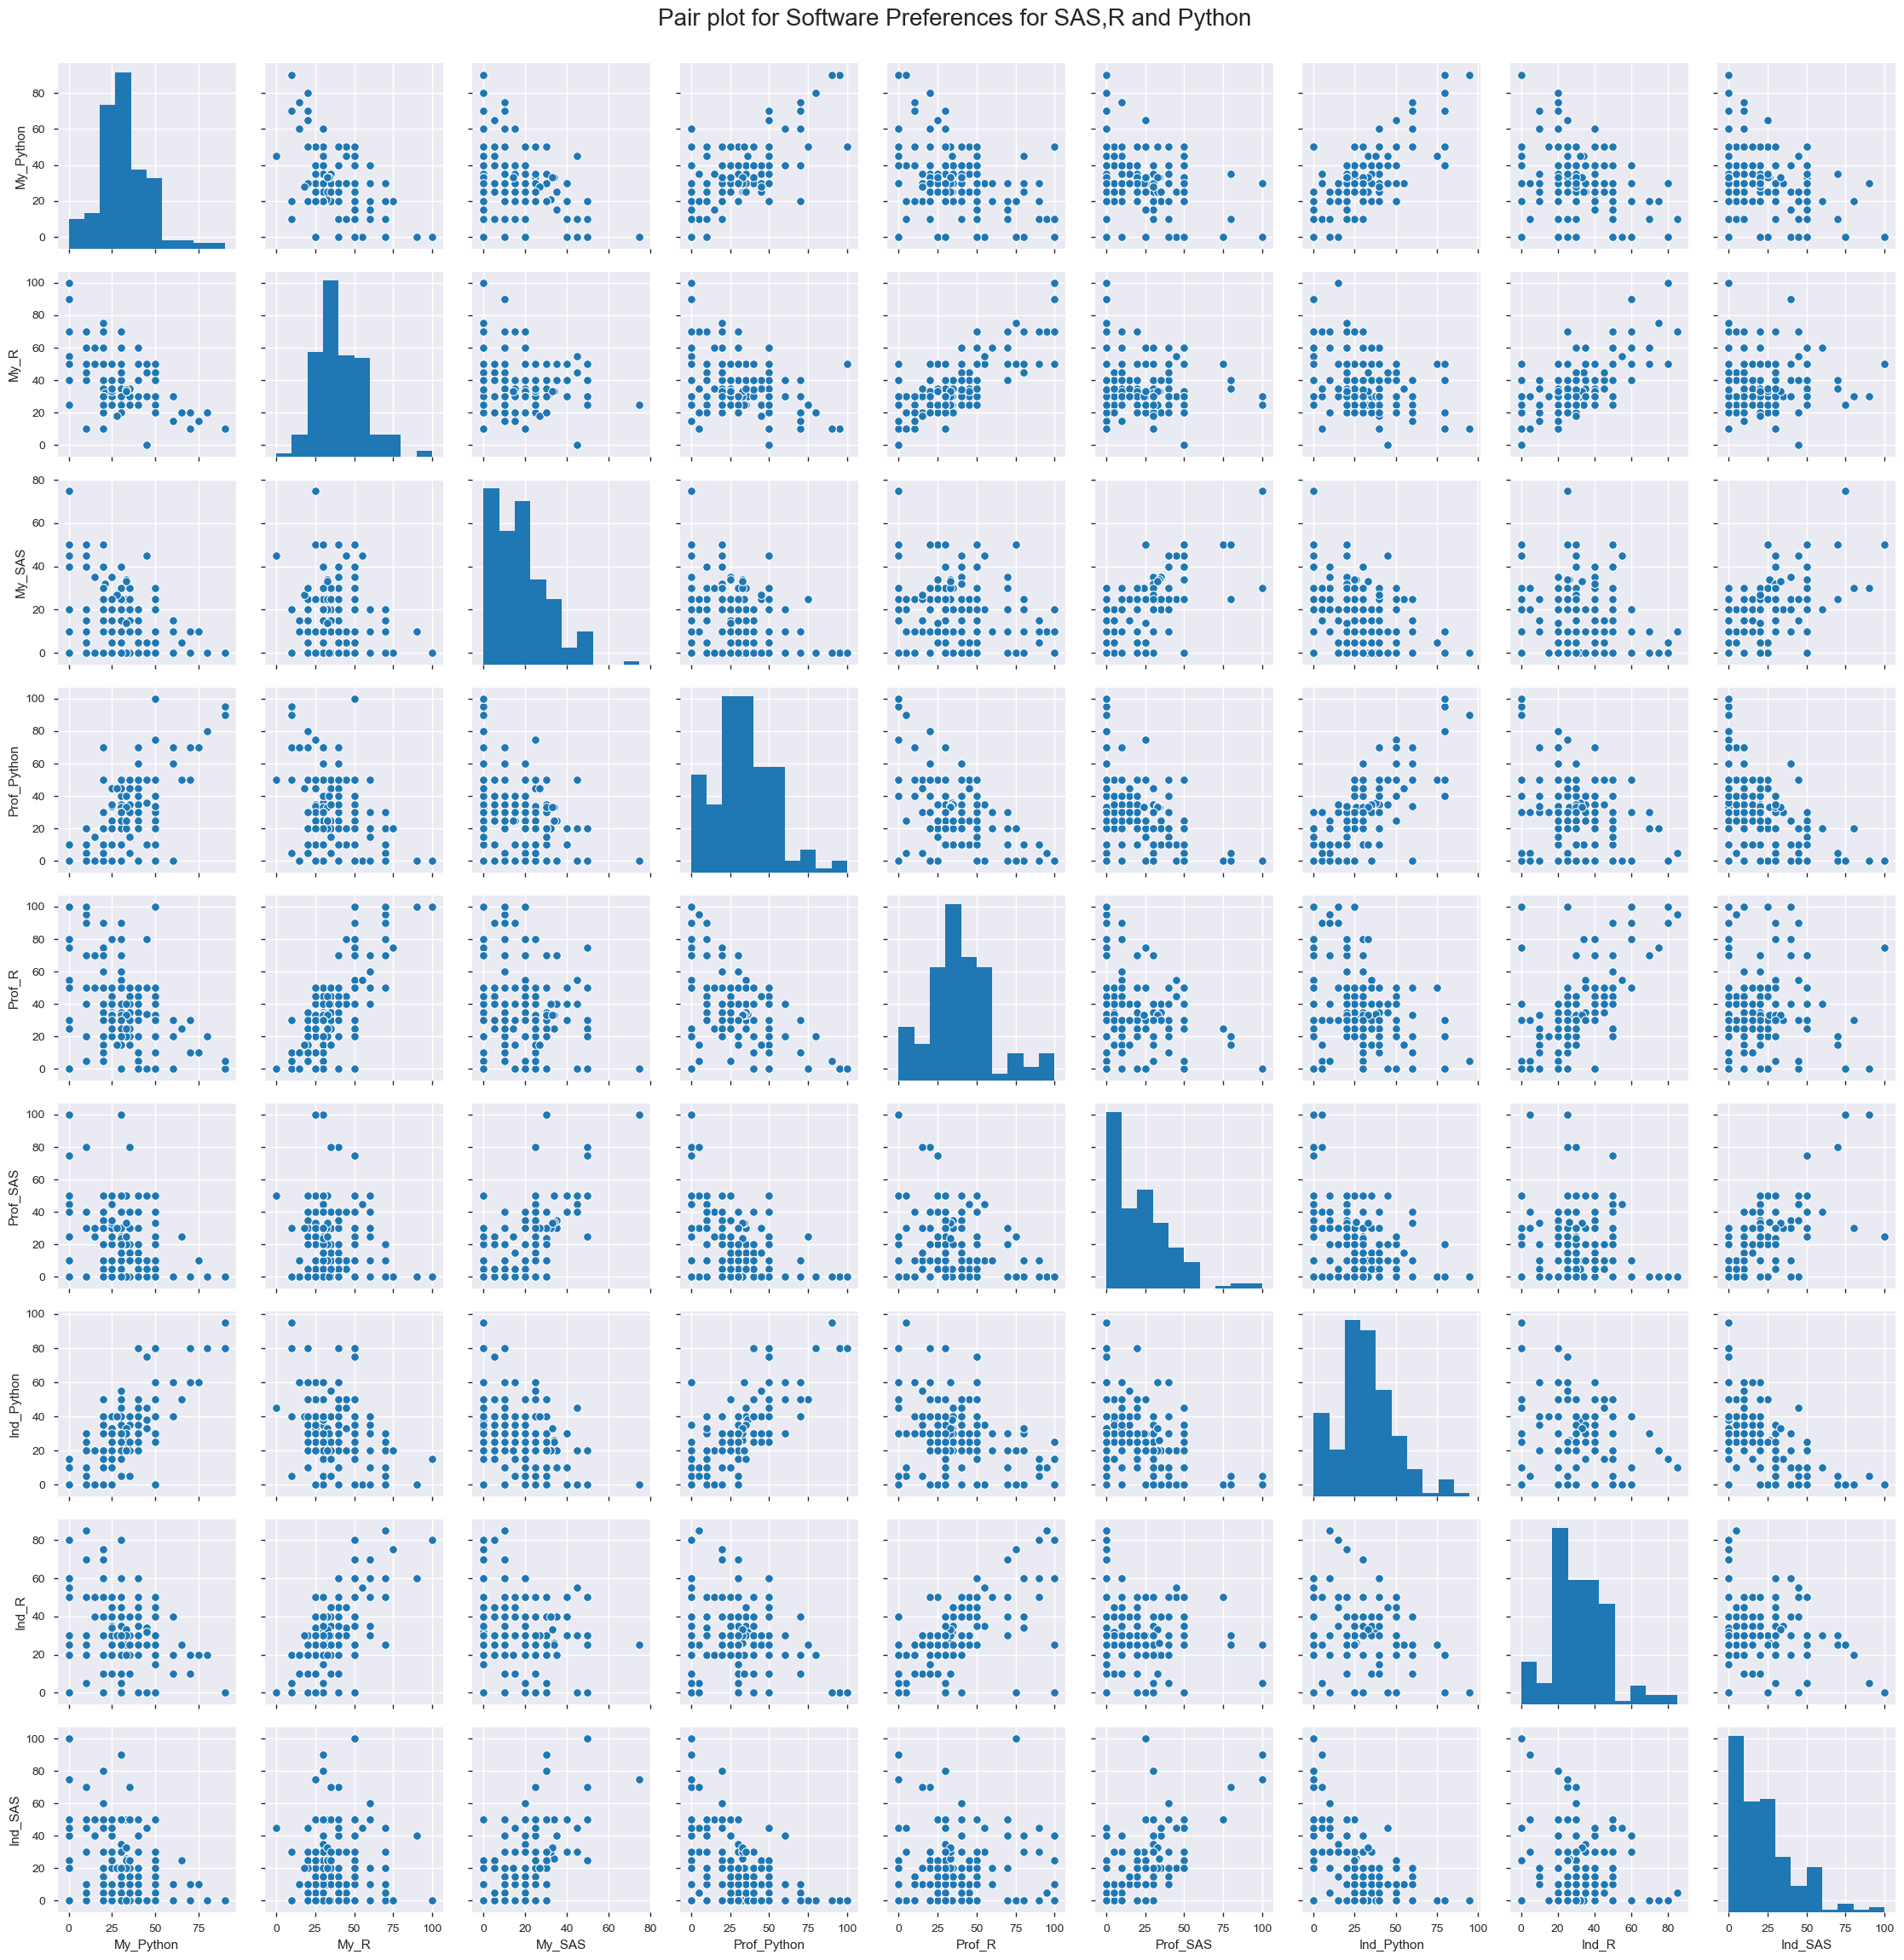

In [59]:
#create a pairs plot with the selected 9 variables
g = sns.pairplot(software_pref_reduced_df)
g.fig.suptitle("Pair plot for Software Preferences for SAS,R and Python ", y=1.02, fontsize=20);   # y= some height>1 to get title displayed
# allows visual examination of the positive, negative and no correlation signals

2. future course interest

''

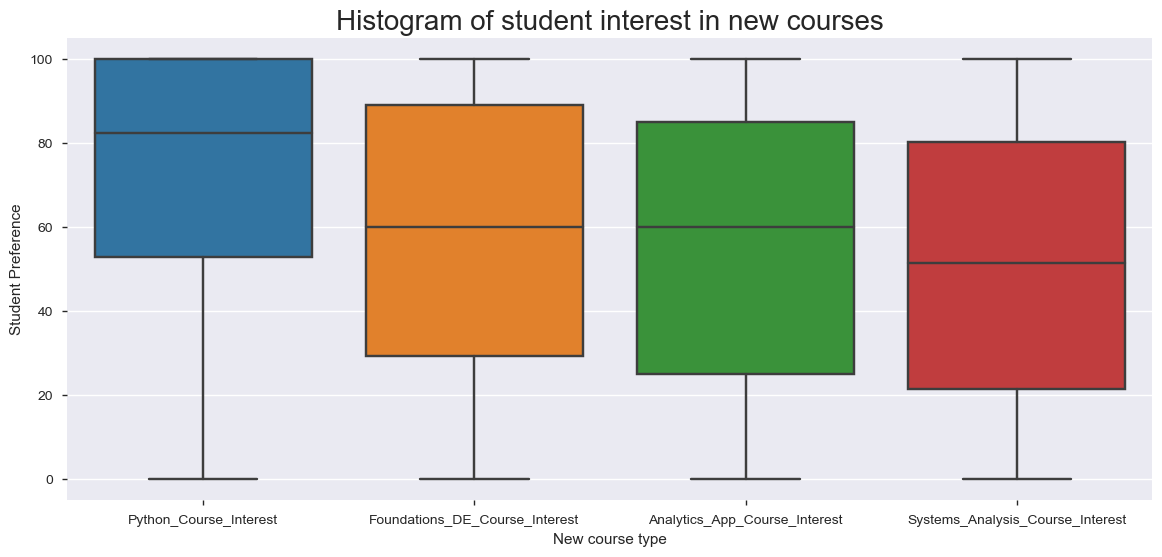

In [60]:
# plot the histogram for interest in new courses
plt.figure(figsize=(14, 6))

ax = sns.boxplot(x="variable", y="value", data=interest_new_df_melt)
plt.ylabel('Student Preference')
plt.xlabel('New course type')
plt.title('Histogram of student interest in new courses', fontsize=20)
;

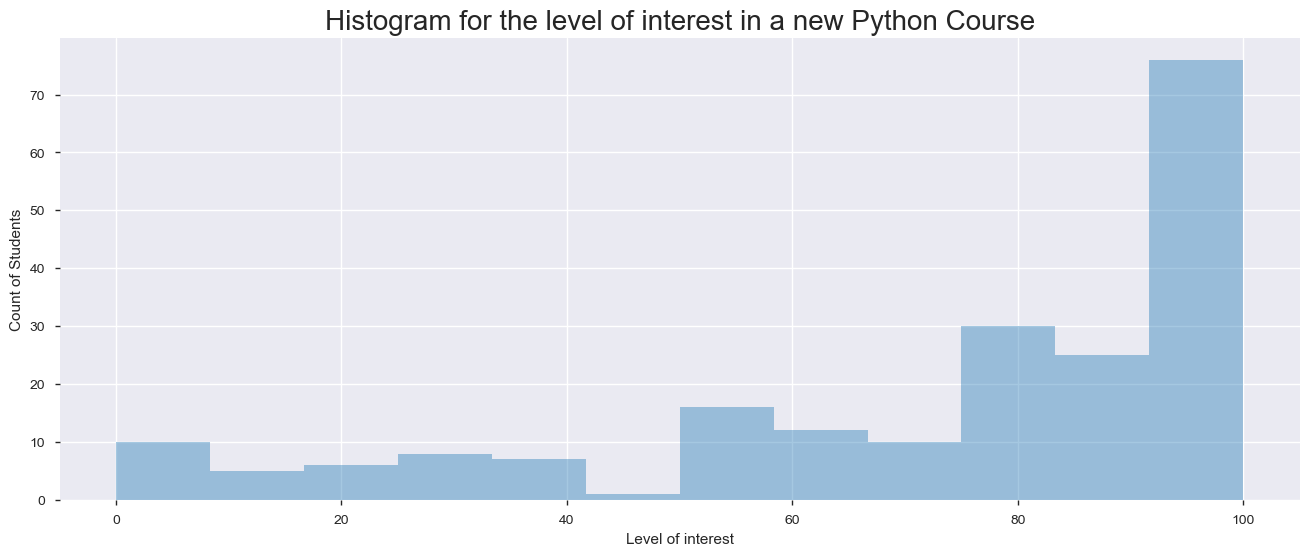

In [61]:
# plot the histogram for the Python Course interest
plt.figure(figsize=(16, 6))
ax = sns.distplot(interest_new_df['Python_Course_Interest'].dropna(), kde=False, bins=12)
plt.ylabel('Count of Students')
plt.xlabel('Level of interest')
plt.title('Histogram for the level of interest in a new Python Course', fontsize=20);

3. courses completed

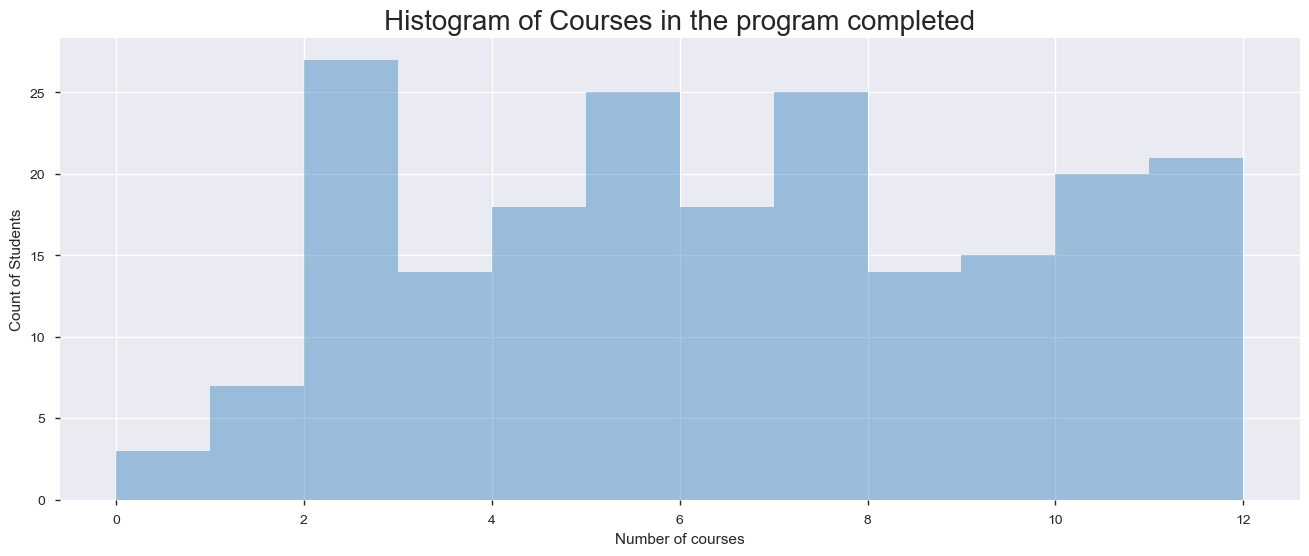

In [62]:
# plot the histogram for courses completed
plt.figure(figsize=(16, 6))
ax = sns.distplot(courses_completed_df['Courses_Completed'].dropna(), kde=False, bins=12)
ax.set_title('Distribution of Courses completed')
plt.ylabel('Count of Students')
plt.xlabel('Number of courses')
plt.title('Histogram of Courses in the program completed', fontsize=20);

In [63]:
courses_completed_melt_df['value'].value_counts()

0    2967
1     966
Name: value, dtype: int64

In [64]:
courses_completed_melt_df['variable'].value_counts()

PREDICT457     207
PREDICT453     207
PREDICT420     207
PREDICT451     207
PREDICT410     207
PREDICT454     207
OtherR         207
PREDICT401     207
PREDICT413     207
PREDICT400     207
PREDICT411     207
PREDICT456     207
OtherPython    207
OtherSAS       207
PREDICT450     207
PREDICT422     207
Other          207
PREDICT455     207
PREDICT452     207
Name: variable, dtype: int64

In [65]:
table = pd.pivot_table(courses_completed_melt_df, values='value', index=['variable'], aggfunc=np.sum)

In [66]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Other to PREDICT457
Data columns (total 1 columns):
value    19 non-null int32
dtypes: int32(1)
memory usage: 228.0+ bytes


In [67]:
table.index.names = ['Courses_Complete']
table.rename(columns = {'value':'Student_count'}, inplace = True)

In [68]:
table.sort_values(by=['Student_count'], inplace=True, ascending=False)
table.reset_index(inplace=True)
table

,Courses_Complete,Student_count
0,PREDICT401,171
1,PREDICT400,163
2,PREDICT410,145
3,PREDICT420,127
4,PREDICT411,113
5,PREDICT413,59
6,PREDICT422,48
7,PREDICT455,30
8,Other,26
9,PREDICT450,17


''

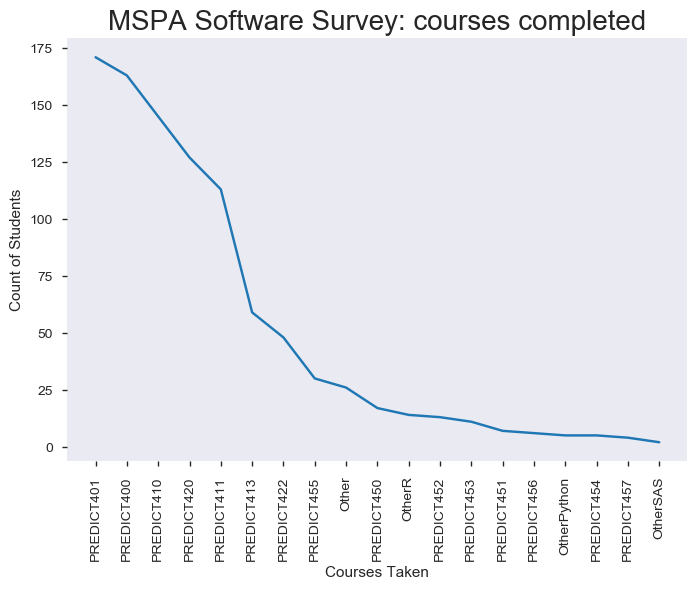

In [69]:
sns.lineplot(x='Courses_Complete', y='Student_count', data=table, sort=False)
plt.xticks(rotation=90)
plt.ylabel('Count of Students')
plt.xlabel('Courses Taken')
plt.title('MSPA Software Survey: courses completed', fontsize=20)
plt.grid()
;

4. graduation date

''

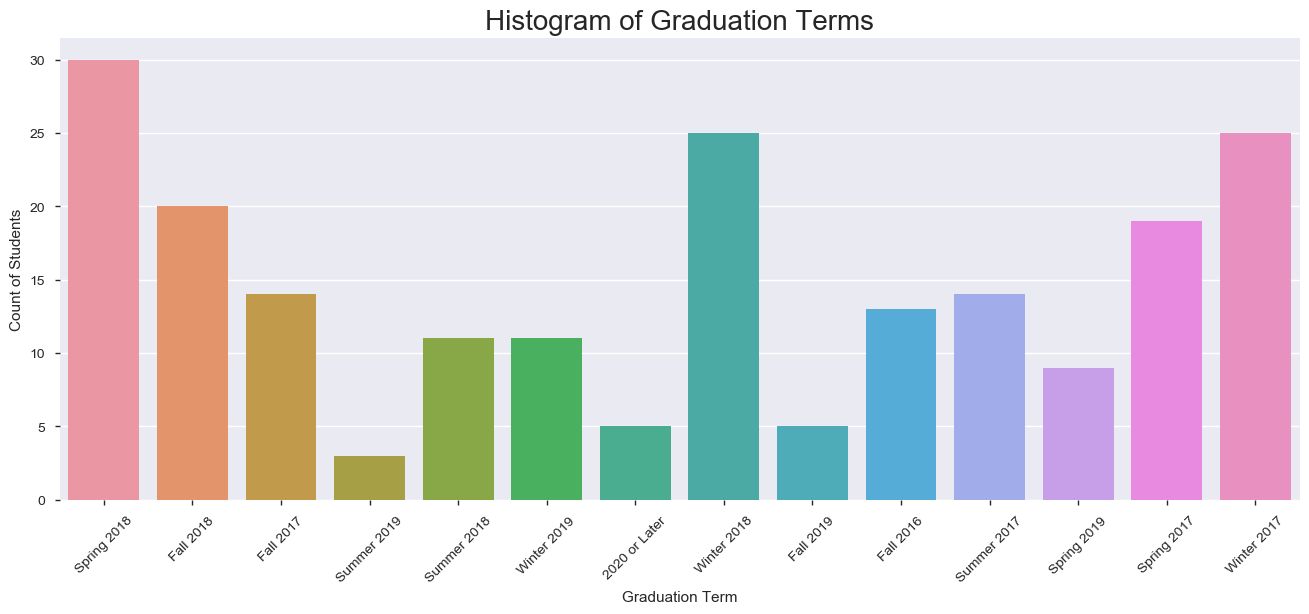

In [70]:
# plot the histogram for graduation terms
plt.figure(figsize=(16, 6))
ax = sns.countplot(graduation['Graduate_Date'])
plt.xticks(rotation=45)
plt.ylabel('Count of Students')
plt.xlabel('Graduation Term')
plt.title('Histogram of Graduation Terms', fontsize=20)
;

''

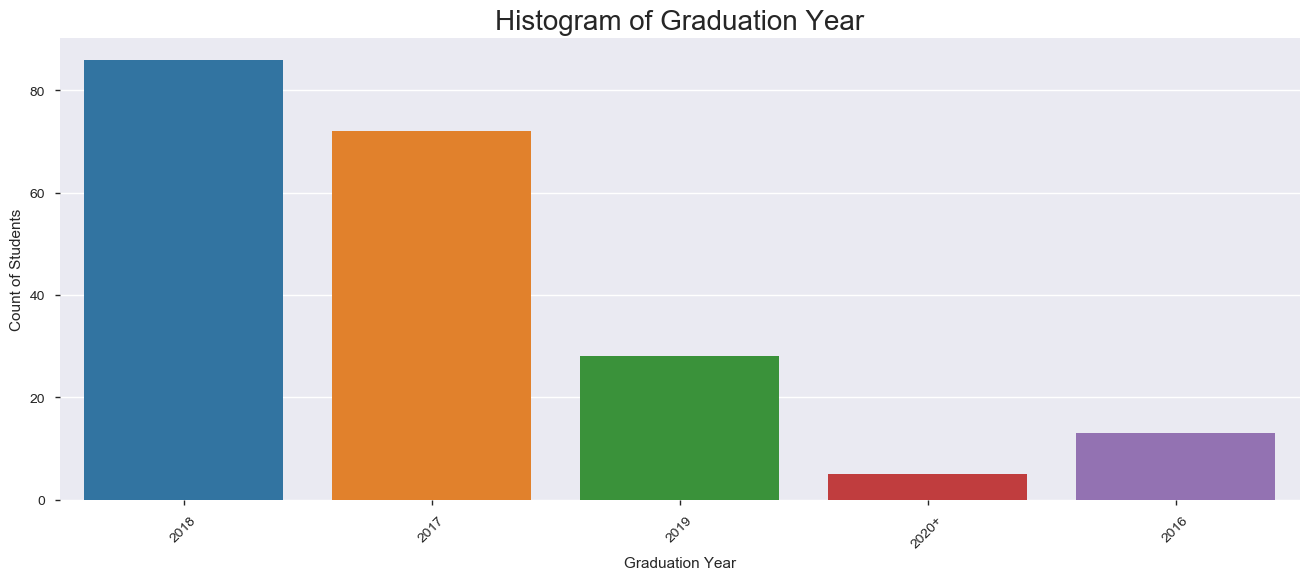

In [71]:
# plot the histogram for graduation year
plt.figure(figsize=(16, 6))
ax = sns.countplot(graduation['Graduation_Year'])
plt.ylabel('Count of Students')
plt.xlabel('Graduation Year')
plt.title('Histogram of Graduation Year', fontsize=20)
plt.xticks(rotation=45)
;

Study different transformations of the variable 'My_Python'

In [72]:
# check for any missing value in the DataFrame column for Python_Course_Interest
software_pref_df[software_pref_df['My_Python'].isnull()]

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
RespondentID,,,,,,,,,,,,,,,


In [73]:
# The natural log (only for x>0) of 0 is undefined so I am not able to run a log tranformation on this variable without either
# 1) removing the 0 entries or 2) tranforming the 0 values to small positive values 
# check for 0 values
software_pref_df['My_Python'].value_counts()

30    47
20    32
40    29
50    22
25    20
0     11
10    11
35    10
33     7
45     4
60     3
70     2
15     2
90     2
80     1
28     1
65     1
21     1
75     1
Name: My_Python, dtype: int64

In [74]:
# change X to floats and substitute the 0 values for 0.01
X = software_pref_df[['My_Python']].dropna()
X = X.astype(float)
X['My_Python'] = X['My_Python'].replace(0, 0.01)
X.head()

,My_Python
RespondentID,
5135740122,0.01
5133300037,50.00
5132253300,40.00
5132096630,25.00
5131990362,0.01


In [75]:
# check X data type - expect float
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 5135740122 to 5109806898
Data columns (total 1 columns):
My_Python    207 non-null float64
dtypes: float64(1)
memory usage: 3.2+ KB


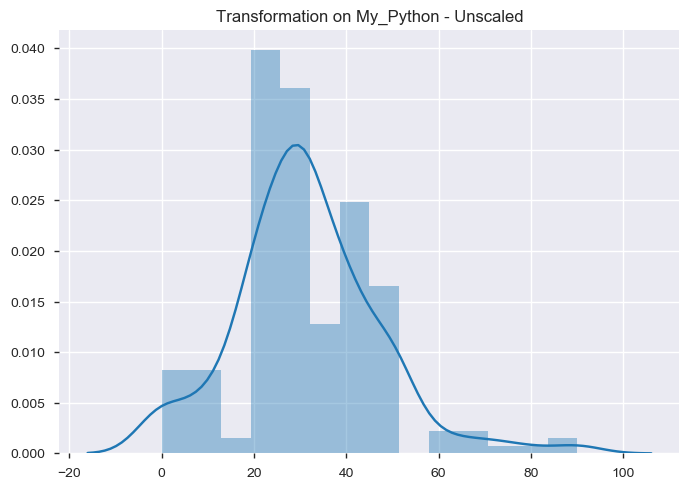

In [76]:
unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Transformation on My_Python - Unscaled');

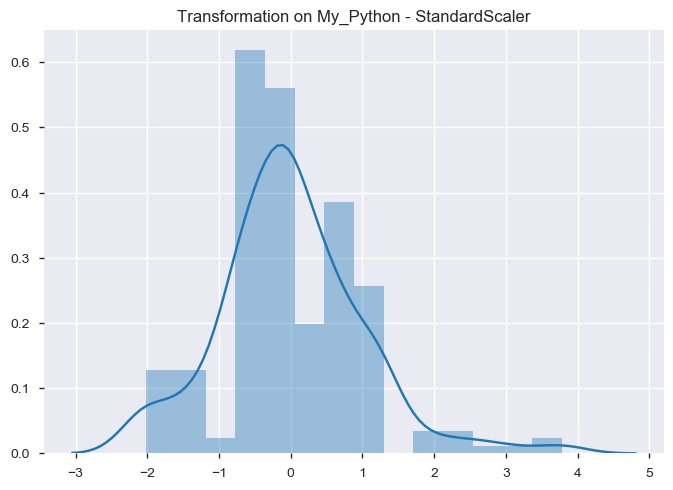

In [77]:
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)).set_title('Transformation on My_Python - StandardScaler');

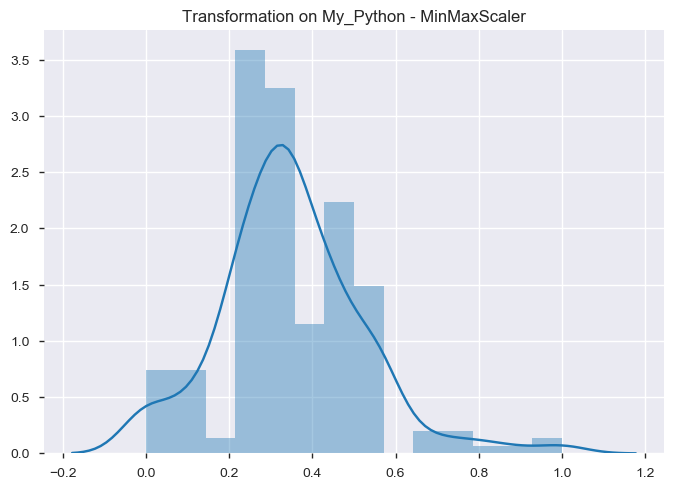

In [78]:
minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)).set_title('Transformation on My_Python - MinMaxScaler');

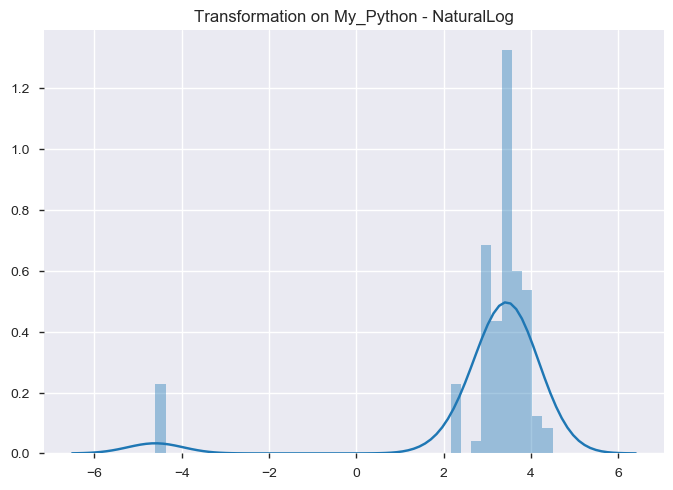

In [79]:
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('Transformation on My_Python - NaturalLog');

### 3. Results and recommendations

There are 207 respondents to the survey. The vast majority will graduate in 2017/18.

The 2 preferred languages from a personal, professional and industry wide view are R and Python, followed by SAS. 
Java/Scala/Spark and JavaScript/HTML/CSS are lowest in preference.
Those that prefer a language are consistent throughout preferences for personal, professional and industry use as seen from the correlation matrix results.

There is a strong preference for Python as a future course.

Faculty should look to increase the Python based content going forward in the program based on these results and continue to survey the students for their input to tailor the program to be as desirable as possible.